In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
import itertools
import operator
import statsmodels.api as sm

In [4]:
online_retail = pd.read_excel('Online Retail.xlsx')


In [5]:
online_retail.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
online_retail['InvoiceDate'] = online_retail['InvoiceDate'].astype('datetime64[ns]')
online_retail['TotalPrice'] = online_retail['Quantity'] * online_retail['UnitPrice']

In [7]:
online_retail.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [8]:
online_retail[online_retail['CustomerID'].isnull()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79


In [9]:
online_retail.set_index('InvoiceDate', inplace=True)


In [10]:
y = online_retail['TotalPrice'].resample('D').sum()


In [11]:
y.head()


InvoiceDate
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-04        0.00
2010-12-05    31383.95
Freq: D, Name: TotalPrice, dtype: float64

In [12]:
y = y.fillna(y.bfill())


In [13]:
y.head()

InvoiceDate
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-04        0.00
2010-12-05    31383.95
Freq: D, Name: TotalPrice, dtype: float64

In [14]:
y.isnull().any()

False

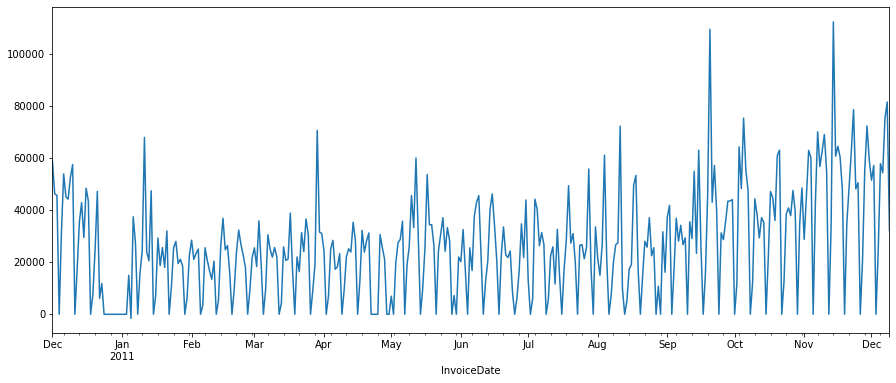

In [15]:
y.plot(figsize=(15,6))
plt.show()

In [16]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

# try adjust the `s` parameter
s = 30
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(p, d, q))]

In [17]:
print('Example of parameter conbination for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[2]))

Example of parameter conbination for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 30)
SARIMAX: (0, 1, 0) x (0, 1, 0, 30)


In [18]:

warnings.filterwarnings('ignore')
history = {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            
            results = mod.fit()
            history[(param, param_seasonal)] = results.aic
            print('ARIMA{}x{} - AIC: {}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC: 8816.648912182303
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC: 8035.356170174893
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC: 7980.175881877349
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC: 7177.618333702034
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC: 7963.30722815676
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC: 7824.846329362357
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC: 7239.915196142408
ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC: 7162.5789462994235
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC: 8601.342527387022
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC: 7890.6905607787485
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC: 7913.723832635697
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC: 7103.993903492554
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC: 7923.154089046349
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC: 7835.4489565362555
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC: 7195.613789876577
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC: 7102.299490943855
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC: 8478.583643249933
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC: 7777.445134205891
ARIMA(0, 1, 0)x(0, 1, 0, 3

In [19]:
sorted_x = sorted(history.items(), key=operator.itemgetter(1))

In [20]:
param, param_seasonal =  sorted_x[0][0][0], sorted_x[0][0][1]


In [21]:
print(param)
print(param_seasonal)

(1, 0, 1)
(1, 1, 1, 30)


In [22]:

model = sm.tsa.statespace.SARIMAX(y,
                         order = param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)

results = model.fit()

In [23]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         TotalPrice   No. Observations:                  374
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 30)   Log Likelihood               -3545.487
Date:                            Sun, 15 Mar 2020   AIC                           7100.973
Time:                                    16:27:36   BIC                           7119.688
Sample:                                12-01-2010   HQIC                          7108.453
                                     - 12-09-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2633      0.222      1.185      0.236      -0.172       0.699
ma.L1          0.2300      0.207   

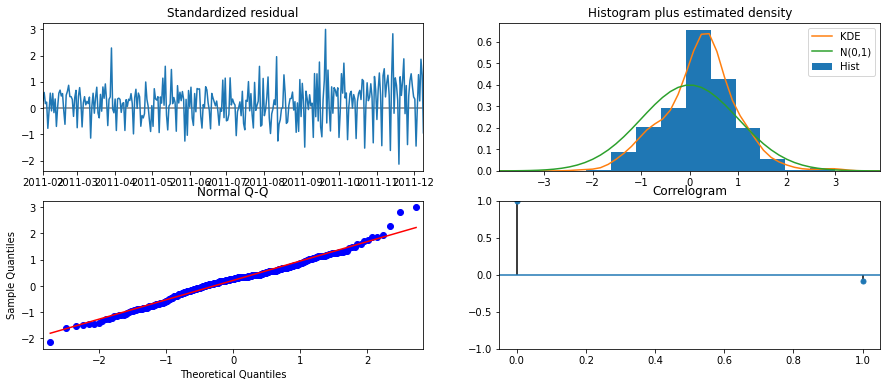

In [24]:
results.plot_diagnostics(lags=1, figsize=(15,6))
plt.show()

# One Step Ahead Forecast

In [25]:
start_date = '2011-05-02'
pred = results.get_prediction(start=pd.to_datetime(start_date), dynamic=False)

In [26]:
pred_ci = pred.conf_int()


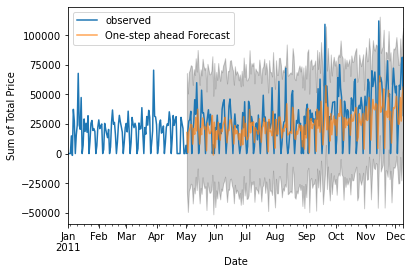

In [27]:
ax = y['2011':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k',
               alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sum of Total Price')

plt.legend()

plt.show()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = y[start_date:]

mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2))) 

The Mean Squared Error of our forecasts is 462010830.75


# Dynamic Forecast 

In [29]:
pred_dynamic = results.get_prediction(start=pd.to_datetime(start_date), dynamic=True)

pred_dynamic_ci = pred_dynamic.conf_int()

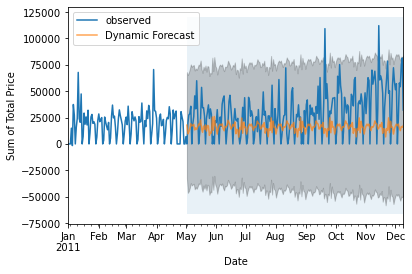

In [30]:
ax = y['2011':].plot(label='observed')

pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=.7)

ax.fill_between(pred_dynamic_ci.index,
               pred_dynamic_ci.iloc[:, 0],
               pred_dynamic_ci.iloc[:, 1], color='k',
               alpha=.2)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(start_date), y.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Sum of Total Price')

plt.legend()

plt.show()

In [31]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y[start_date:]
mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 690620793.57


# Visuliazing Forecast

In [32]:
pred_uc = results.get_forecast(steps=30)

pred_ci = pred_uc.conf_int()

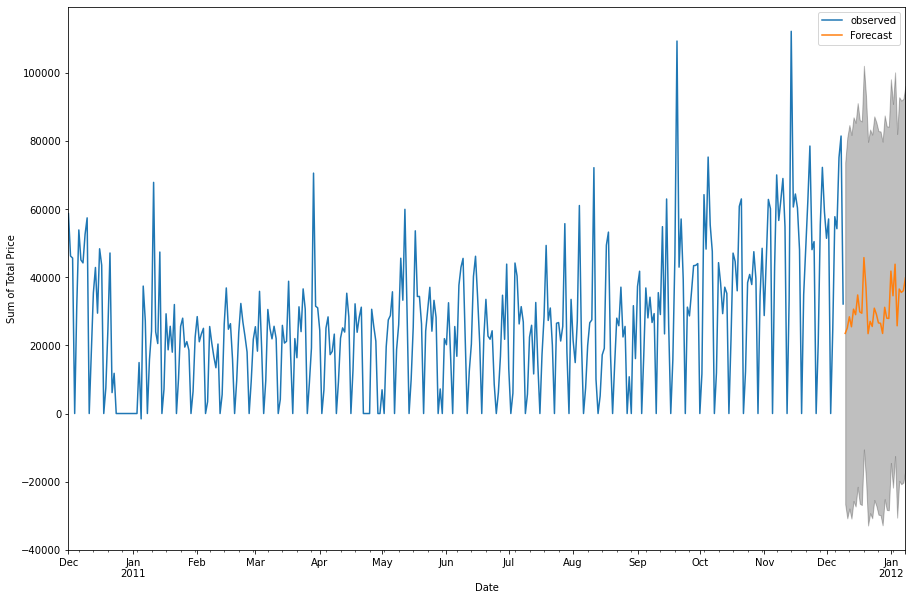

In [33]:

ax = y.plot(label='observed', figsize=(15,10))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1],
               color='k',
               alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Sum of Total Price')

plt.legend()
plt.show()